<a href="https://colab.research.google.com/github/prabirdeb/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Steps of Exploratory Data Analysis (EDA)**

### **1. Connection with the Data**

Here, we are provided with a dataset with more than 180,000 terrorist attacks.

Thus, the dataset is actually a collection of more than 180,000 experiences about worldwide terrorist attacks. 

Now, we need to **decode the set of experiences** to help in building solid future strategies to fight against the terrorist gangs.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib 
from sklearn.preprocessing import LabelEncoder

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the data as pandas dataframe
terror_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Global Terrorism Analysis-Prabir Debnath/Global Terrorism Data.csv',encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### **2. First Feelings of the Data**

Here, the columns are the set of features, showing the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [4]:
terror_df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


### **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions and thus step by step, we find the most important features or the exact way to decode the experiences.

“**what gets measured gets done**“.

In [5]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
terror_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [7]:
# Checking the unique values for each column
for column_name in terror_df.columns:
  print(colored(f"Unique values for {column_name}:",'blue', attrs=['bold']))
  print(terror_df[column_name].unique())

Unique values for eventid:
[197000000001 197000000002 197001000001 ... 201712310030 201712310031
 201712310032]
Unique values for iyear:
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
Unique values for imonth:
[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
Unique values for iday:
[ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
Unique values for approxdate:
[nan 'January 19-20, 1970' 'February 6-9, 1970' ... '2017-12-29 00:00:00'
 'December 25, 2017-January 5, 2018' '2017-12-31 00:00:00']
Unique values for extended:
[0 1]
Unique values for resolution:
[nan '3/8/1970' '3/15/1970' ... '3/23/2013' '12/9/2011' '12/27/2011']
Unique values for country:
[  58  130  160   78  101  217  218   98  499   65   83  222  362  199
  102  185   30   60   11  110   96  

In [8]:
# Checking the no. of unique values in each column
for column_name in terror_df.columns:
  print(colored(f"No. of unique values for {column_name}:",'green', attrs=['bold']))
  print(terror_df[column_name].nunique())

No. of unique values for eventid:
181691
No. of unique values for iyear:
47
No. of unique values for imonth:
13
No. of unique values for iday:
32
No. of unique values for approxdate:
2244
No. of unique values for extended:
2
No. of unique values for resolution:
1859
No. of unique values for country:
205
No. of unique values for country_txt:
205
No. of unique values for region:
12
No. of unique values for region_txt:
12
No. of unique values for provstate:
2855
No. of unique values for city:
36674
No. of unique values for latitude:
48322
No. of unique values for longitude:
48039
No. of unique values for specificity:
5
No. of unique values for vicinity:
3
No. of unique values for location:
44109
No. of unique values for summary:
112492
No. of unique values for crit1:
2
No. of unique values for crit2:
2
No. of unique values for crit3:
2
No. of unique values for doubtterr:
3
No. of unique values for alternative:
5
No. of unique values for alternative_txt:
5
No. of unique values for multiple

In [9]:
# checking the no. of null values in each column
for column_name in terror_df.columns:
  print(colored(f"No. of null values for {column_name}:",'magenta', attrs=['bold']))
  print(terror_df[column_name].isnull().sum())

No. of null values for eventid:
0
No. of null values for iyear:
0
No. of null values for imonth:
0
No. of null values for iday:
0
No. of null values for approxdate:
172452
No. of null values for extended:
0
No. of null values for resolution:
179471
No. of null values for country:
0
No. of null values for country_txt:
0
No. of null values for region:
0
No. of null values for region_txt:
0
No. of null values for provstate:
421
No. of null values for city:
434
No. of null values for latitude:
4556
No. of null values for longitude:
4557
No. of null values for specificity:
6
No. of null values for vicinity:
0
No. of null values for location:
126196
No. of null values for summary:
66129
No. of null values for crit1:
0
No. of null values for crit2:
0
No. of null values for crit3:
0
No. of null values for doubtterr:
1
No. of null values for alternative:
152680
No. of null values for alternative_txt:
152680
No. of null values for multiple:
1
No. of null values for success:
0
No. of null values 

In [10]:
# Finding out the important columns considering type of unique values, less no. of unique values and less no. of null values
important_columns=['iyear','latitude','longitude','country_txt','region_txt','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt',
                         'natlty1_txt','gname','weaptype1_txt','nkill','nkillus','nkillter','nwound','nwoundus',
                         'nwoundte']

### **4. Cleaning the Data**

Now we can create a clean experience set with important features. 

In this step, we treat the missing values or "?" values through imputation if required.

If there is any string containing a Python literal in any of the important feature, we must evaluate them

We may also create new feature if found important during the analysis.

We check the statistics further on clean data.

In [11]:
terror_df=terror_df[important_columns]

In [12]:
nominal_columns=['country_txt','region_txt','attacktype1_txt','targtype1_txt','targsubtype1_txt','gname','weaptype1_txt']

In [13]:
terror_nominal_df=terror_df[nominal_columns]

In [14]:
# Renaming nominal columns
terror_nominal_df.columns=['countries','region','attack_type','target_type','target_subtype','gang_name','weapon_type']

In [15]:
# Checking top five categories in percentage
for column_name in terror_nominal_df.columns:
  print(colored(f"Top five {column_name} in percentage:", attrs=['bold']))
  print(round(terror_nominal_df[column_name].value_counts()[:5]*100/terror_nominal_df[column_name].value_counts().sum(),2))

Top five countries in percentage:
Iraq           13.56
Pakistan        7.91
Afghanistan     7.01
India           6.58
Colombia        4.57
Name: countries, dtype: float64
Top five region in percentage:
Middle East & North Africa    27.78
South Asia                    24.75
South America                 10.45
Sub-Saharan Africa             9.66
Western Europe                 9.16
Name: region, dtype: float64
Top five attack_type in percentage:
Bombing/Explosion                 48.57
Armed Assault                     23.48
Assassination                     10.63
Hostage Taking (Kidnapping)        6.14
Facility/Infrastructure Attack     5.70
Name: attack_type, dtype: float64
Top five target_type in percentage:
Private Citizens & Property    23.95
Military                       15.40
Police                         13.49
Government (General)           11.71
Business                       11.38
Name: target_type, dtype: float64
Top five target_subtype in percentage:
Unnamed Civilian/Unspecif

In [16]:
num_columns=['latitude','longitude','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte']

In [17]:
terror_num_df=terror_df[num_columns]

In [18]:
# Understanding the statistics of the numerical columns
terror_num_df.describe()

,latitude,longitude,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
count,177135.000000,1.771340e+05,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000
mean,23.498343,-4.586957e+02,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163
std,18.569242,2.047790e+05,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881
min,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.510046,4.545640e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.467463,4.324651e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.685087,6.871033e+01,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,74.633553,1.793667e+02,1570.000000,1360.000000,500.000000,8191.000000,751.000000,200.000000


### **5. Detecting Anomalies in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the outlier or **exceptional observations** for all the important features and keep them aside during the analysis.

Here, no anomalies have been found in the terror_num_df which may affect our analysis to reach final conclusion.

### **6. Visualizing the Data**

When we know all the important features of our experiences, we can go a step ahead by finding the relationship among features. Here, we take the help of visualization because

**"A picture is worth a thousand words"**

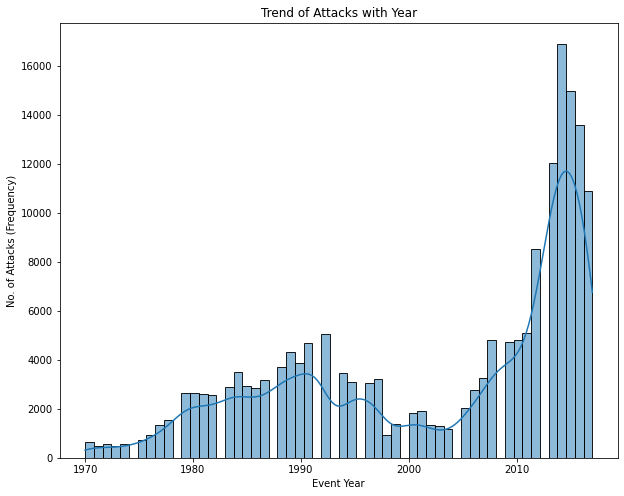

In [19]:
# Plotting no. of attacks in histogram
plt.figure(figsize=(10,8))
sns.histplot(x='iyear',data=terror_df,kde=True)
plt.title('Trend of Attacks with Year')
plt.ylabel('No. of Attacks (Frequency)')
plt.xlabel('Event Year')
plt.show()

In [20]:
print(f" There is {round(dict(terror_df['iyear'].value_counts()).get(2017)/dict(terror_df['iyear'].value_counts()).get(1970),0)} times increase in terrorist attacks from 1970 to 2017")
print(f" There is {round(dict(terror_df['iyear'].value_counts()).get(2014)/dict(terror_df['iyear'].value_counts()).get(1970),0)} times increase in terrorist attacks iin 2014")


 There is 17.0 times increase in terrorist attacks from 1970 to 2017
 There is 26.0 times increase in terrorist attacks iin 2014


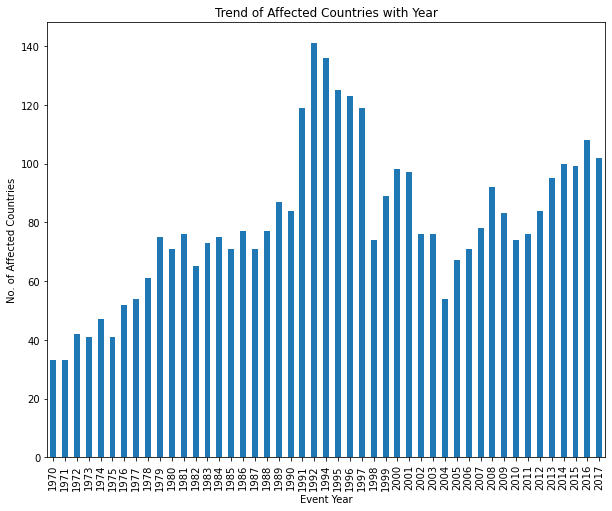

In [21]:
# Plotting no. of affected countries in bar
plt.figure(figsize=(10,8))
terror_df.groupby(['iyear'])['country_txt'].nunique().plot.bar()
plt.title('Trend of Affected Countries with Year')
plt.ylabel('No. of Affected Countries')
plt.xlabel('Event Year')
plt.show()

In [22]:
print(f" No. of affected countries increased from {dict(terror_df.groupby(['iyear'])['country_txt'].nunique()).get(1970)} to {dict(terror_df.groupby(['iyear'])['country_txt'].nunique()).get(2017)} in this {2017-1970} years time")

 No. of affected countries increased from 33 to 102 in this 47 years time


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


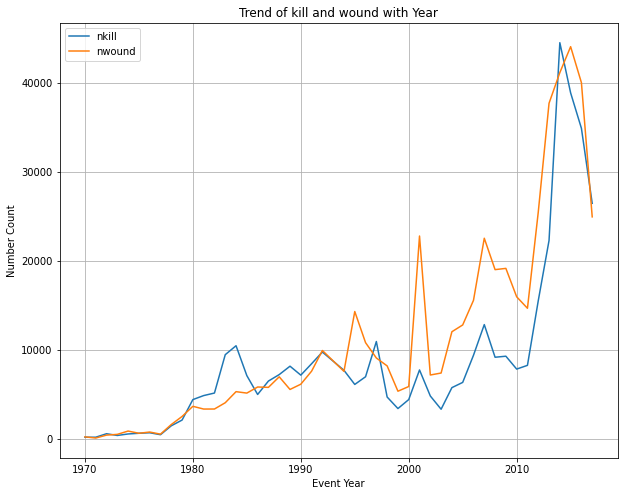

In [23]:
# Plotting number count for kill and wound with line
terror_df.groupby(['iyear'])['nkill','nwound'].sum().plot.line(figsize=(10,8))
plt.title('Trend of kill and wound with Year')
plt.ylabel('Number Count')
plt.xlabel('Event Year')
plt.grid()
plt.show()

In [24]:
terror_df[['nkill','nkillus','nkillter','nwound','nwoundus','nwoundte']].sum()

nkill       411868.0
nkillus       5391.0
nkillter     58291.0
nwound      523869.0
nwoundus      4556.0
nwoundte     12061.0
dtype: float64

In [25]:
# Plotting no. of Bombing/Explosion in bar

In [26]:
x=list(dict(terror_df['country_txt'].value_counts()[:5]).keys())
x

['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia']

In [27]:
y=[dict(terror_df.groupby(['country_txt'])['attacktype1_txt'].value_counts()).get((i, 'Bombing/Explosion')) for i in x]
y

[18286, 7613, 6245, 4825, 3128]

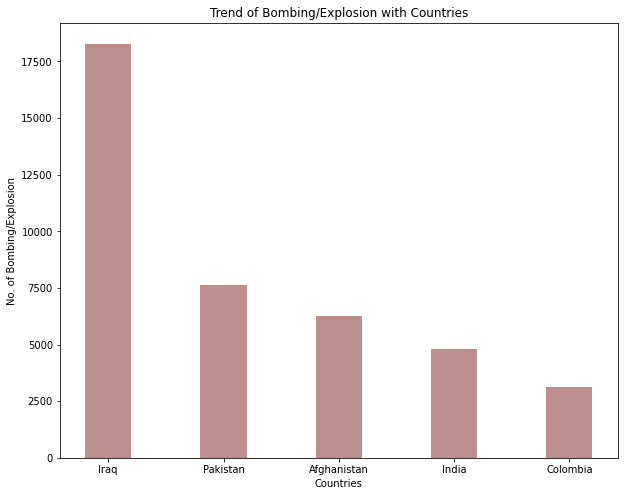

In [28]:
plt.figure(figsize=(10,8))
plt.bar(x,y,width=0.4,color='rosybrown')
plt.title('Trend of Bombing/Explosion with Countries')
plt.ylabel('No. of Bombing/Explosion')
plt.xlabel('Countries')
plt.show()

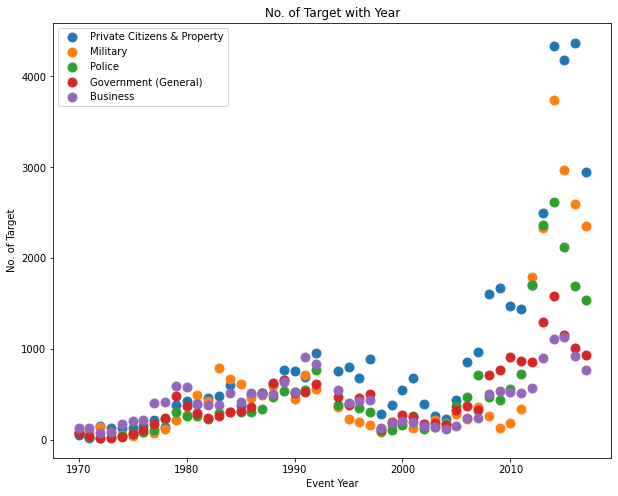

In [29]:
# Plottig Target types in scatter
plt.figure(figsize=(10,8))
list_of_targets=['Private Citizens & Property','Military','Police','Government (General)','Business']
for target in list_of_targets:
  x=list(terror_df.iyear.unique())
  y=[dict(terror_df.groupby(['iyear'])['targtype1_txt'].value_counts()).get((i, target)) for i in x]
  plt.scatter(x, y,s=80)

plt.title('No. of Target with Year')
plt.ylabel('No. of Target')
plt.xlabel('Event Year')
plt.legend(list_of_targets)
plt.show()

In [30]:
# Converting Categorical columns to numerical columns
label_encoder = LabelEncoder()
for k in terror_nominal_df.columns:
  
  X=terror_nominal_df[k].values
  y = label_encoder.fit_transform(X)
    
  name=k+'_new'
  terror_nominal_df[name]=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [31]:
terror_nominal_df.iloc[:,7:].head(2)

,countries_new,region_new,attack_type_new,target_type_new,target_subtype_new,gang_name_new,weapon_type_new
0,47,1,1,13,59,1907,10
1,116,6,6,5,15,13,10


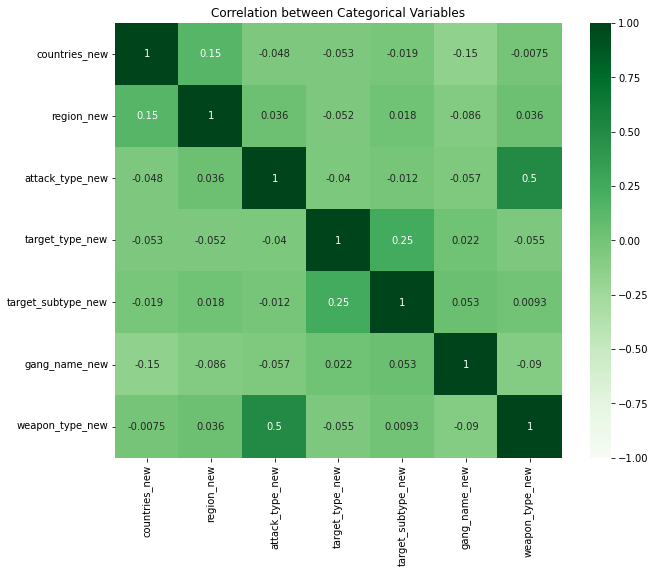

In [32]:
# Plotting Correlation between Categorical Variables with heatmap
plt.figure(figsize=(10,8))
sns.heatmap(terror_nominal_df.iloc[:,7:].corr(), vmin=-1, cmap='Greens', annot=True)
plt.title('Correlation between Categorical Variables')
plt.show()

In [33]:
# There is high positive correlation between attack_type and weapon_type. Thus we can drop weapon_type from the list of important columns.
# There is high positive correlation between target_type and target_subtype. Thus we can drop target_subtype from the list of important columns.

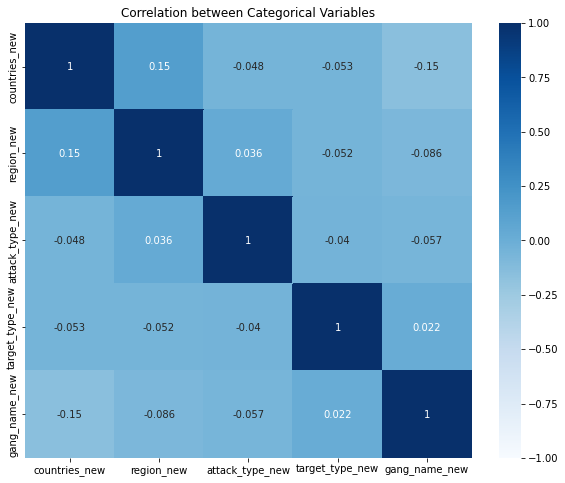

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(terror_nominal_df.iloc[:,7:].drop(['weapon_type_new','target_subtype_new'], axis = 1).corr(), vmin=-1, cmap='Blues', annot=True)
plt.title('Correlation between Categorical Variables')
plt.show()


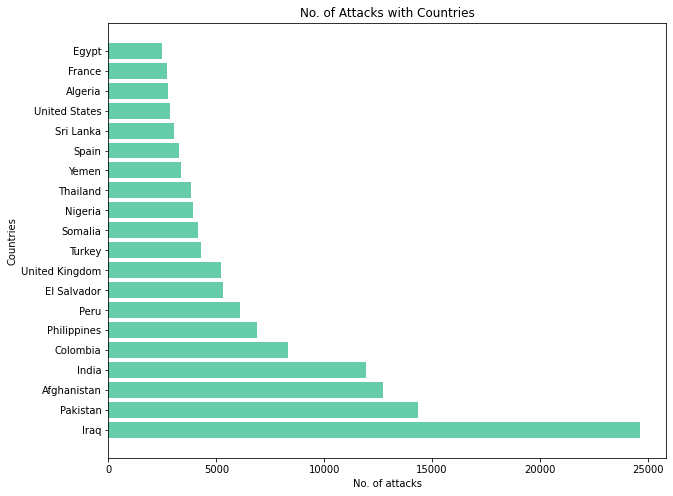

In [55]:
# Plotting no. of attacks with countries
x=list(dict(terror_df.country_txt.value_counts()).values())[:20]
y=list(dict(terror_df.country_txt.value_counts()).keys())[:20]
plt.figure(figsize=(10,8))
plt.barh(y,x,color='mediumaquamarine')
plt.title('No. of Attacks with Countries')
plt.ylabel('Countries')
plt.xlabel('No. of attacks')
plt.show()

### **7. Conclusion from the Data**


**i. There is 17 times increase in terrorist attacks from 1970 to 2017 along with maximum of 26 times increase in 2014.**

**ii. Number of affected countries increased from 33 to 102 in this 47 years time**

**iii. More than 4 lacks people killed and more than 5 lacks people got wounded during this period.**

**iv. 49 % of attacks are through Bombing/Explosion. More than 18,000 bombing explosions occurred in Iraq and more than 7,500 occurred in Pakistan, 2nd highest**

**v. 29 % of the attacks are on Military & Police and and 24 % of the attacks are on Private Citizens & Property**

**vi. 40 % of the attacks are in five countries (Iraq, Pakistan, Afghanistan, India, Colombia) of Middle East, North Africa and South Asia region**

**vii. Mean latitude of all attack is 23.5 deg North which is exactly the *Tropic of Cancer* holding the world's best geographical locations. This clearly indicates that, all the terrorist gangs (Taliban, ISIL, SL, FMLN,etc.) are unitedly working towards capturing the world's best geographical locations to rule the world.**

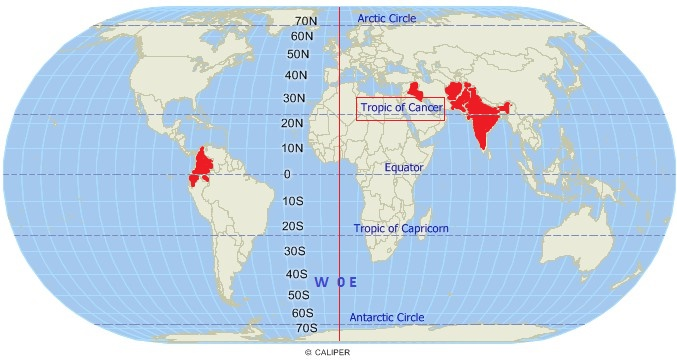